# EDA and Cleaning of Airbnb Rental Data

A dataset consisteting of Airbnb rental listings New York's five boroughs. The dataset has several inconsistencies and errors such as datatype errors, string formatting issues, ratings above thew maximum, and date errors to name a few. I will perform and EDA on the dataset to try and identify and correct the above mentioned issues as well as others.

In [3]:
# Loading The Appropriate Libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno

In [4]:
airbnb = pd.read_csv('airbnb.csv', parse_dates= True)

In [6]:
# Inspecting the dataframe
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,12/12/2018,0.70,85,4.100954,12.0,0.609432,08/06/2018
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,30/06/2019,1.00,145,3.367600,1.2,0.746135,25/12/2018
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,15/08/2018
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,23/09/2017,0.13,0,4.763203,6.0,0.769947,20/03/2017
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,12/06/2019,2.29,102,3.822591,27.6,0.649383,23/10/2020


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

In [8]:
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


In [9]:
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [10]:
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [11]:
# Categorical Label Inconsitencies 
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [12]:
airbnb['room_type'].value_counts()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Distribution of Ratings')

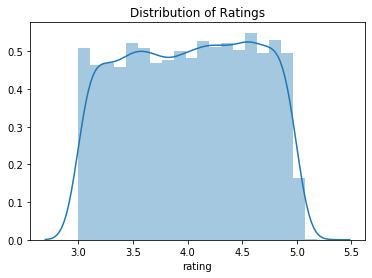

In [13]:
sns.distplot(airbnb['rating'], bins=20)
plt.title('Distribution of Ratings')

In [14]:
# Cleaning Date Types 
# Split coordinates col into long/lat columns/convert data to float
# Remove $ from price/convert to float
# Convert listing_added and last_review to DateTimeDate Types

In [110]:
airbnb.head(2)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
0,3831.0,0.757366,194.0,Brooklyn,4869.0,LisaRoxanne,1.0,2019-07-05,40.68514,-73.95976,Cozy Entire Floor of Brownstone,Clinton Hill,270.0,324.0,4.64,Entire Home or Apartment,89.0,3.273935,2018-12-30
1,6848.0,0.789743,46.0,Brooklyn,15991.0,Allen & Irina,1.0,2019-06-29,40.70837,-73.95352,Only 2 stops to Manhattan studio,Williamsburg,148.0,177.6,1.20,Entire Home or Apartment,140.0,3.495760,2018-12-24


In [16]:
#Preparing The Coords For Dtype Conversion 
airbnb['coordinates'] = airbnb['coordinates'].str.replace('(', '')
airbnb['coordinates'] = airbnb['coordinates'].str.replace(')', '')

airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,12/12/2018,0.70,85,4.100954,12.0,0.609432,08/06/2018
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,30/06/2019,1.00,145,3.367600,1.2,0.746135,25/12/2018
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,15/08/2018
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,23/09/2017,0.13,0,4.763203,6.0,0.769947,20/03/2017
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,12/06/2019,2.29,102,3.822591,27.6,0.649383,23/10/2020


In [17]:
#Splitting The Coords
lat_long = airbnb['coordinates'].str.split(",", expand= True)
lat_long

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354
...,...,...
10014,40.80379,-73.95257
10015,40.79531,-73.9333
10016,40.68266,-73.96743000000002
10017,40.68832,-73.96366


In [18]:
# Reassigning The Coords To Columns
airbnb['latitude'] = lat_long[0]
airbnb['longitude'] = lat_long[1]
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,12/12/2018,0.70,85,4.100954,12.0,0.609432,08/06/2018,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,30/06/2019,1.00,145,3.367600,1.2,0.746135,25/12/2018,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,15/08/2018,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,23/09/2017,0.13,0,4.763203,6.0,0.769947,20/03/2017,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,12/06/2019,2.29,102,3.822591,27.6,0.649383,23/10/2020,40.71884,-73.98354


In [19]:
# Dropping The Redundant Column
airbnb.drop(columns= 'coordinates', inplace=True)

In [20]:
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,12/12/2018,0.70,85,4.100954,12.0,0.609432,08/06/2018,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,30/06/2019,1.00,145,3.367600,1.2,0.746135,25/12/2018,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,15/08/2018,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,23/09/2017,0.13,0,4.763203,6.0,0.769947,20/03/2017,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,12/06/2019,2.29,102,3.822591,27.6,0.649383,23/10/2020,40.71884,-73.98354


In [22]:
#Converting The Dtypes
airbnb['latitude'] = airbnb['latitude'].astype(float)
airbnb['longitude'] = airbnb['longitude'].astype(float)
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [23]:
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,12/12/2018,0.70,85,4.100954,12.0,0.609432,08/06/2018,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,30/06/2019,1.00,145,3.367600,1.2,0.746135,25/12/2018,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,15/08/2018,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,23/09/2017,0.13,0,4.763203,6.0,0.769947,20/03/2017,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,12/06/2019,2.29,102,3.822591,27.6,0.649383,23/10/2020,40.71884,-73.98354


In [24]:
#Stripping The $ From The Price Column
airbnb['price'] = airbnb['price'].str.strip('$')
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45,10,12/12/2018,0.70,85,4.100954,12.0,0.609432,08/06/2018,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135,1,30/06/2019,1.00,145,3.367600,1.2,0.746135,25/12/2018,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150,0,NaN,NaN,65,NaN,NaN,NaN,15/08/2018,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86,5,23/09/2017,0.13,0,4.763203,6.0,0.769947,20/03/2017,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160,23,12/06/2019,2.29,102,3.822591,27.6,0.649383,23/10/2020,40.71884,-73.98354


In [25]:
# Converting Price Column To Float
airbnb['price'] = airbnb['price'].astype(float)
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                 float64
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [26]:
airbnb[['last_review', 'listing_added']].head()

,last_review,listing_added
0,12/12/2018,08/06/2018
1,30/06/2019,25/12/2018
2,NaN,15/08/2018
3,23/09/2017,20/03/2017
4,12/06/2019,23/10/2020


In [27]:
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format='%d/%m/%Y')
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format='%d/%m/%Y')

In [28]:
airbnb.dtypes

listing_id                     int64
name                          object
host_id                        int64
host_name                     object
neighbourhood_full            object
room_type                     object
price                        float64
number_of_reviews              int64
last_review           datetime64[ns]
reviews_per_month            float64
availability_365               int64
rating                       float64
number_of_stays              float64
5_stars                      float64
listing_added         datetime64[ns]
latitude                     float64
longitude                    float64
dtype: object

In [29]:
#Cleaning Text and Categorical 
#Collapse room_type to correct categories 
#Divide neighborhood_full into two columns 

In [30]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [31]:
airbnb['room_type'] = airbnb['room_type'].str.strip()
airbnb['room_type'] = airbnb['room_type'].str.lower()

In [32]:
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [33]:
mappings = {'private room':'Private Room', 
            'private':'Private Room', 
            'shared room': 'Shared Room', 
            'entire home/apt':'Entire Home or Apartment', 
            'home':'Entire Home or Apartment'} 

airbnb['room_type'] = airbnb['room_type'].replace(mappings)

In [34]:
airbnb['room_type'].unique()

array(['Private Room', 'Entire Home or Apartment', 'Shared Room'],
      dtype=object)

In [35]:
airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [36]:
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(',', expand = True)
borough_neighbourhood

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side
...,...,...
10014,Manhattan,Harlem
10015,Manhattan,East Harlem
10016,Brooklyn,Clinton Hill
10017,Brooklyn,Clinton Hill


In [37]:
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire Home or Apartment,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire Home or Apartment,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire Home or Apartment,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side


In [38]:
airbnb.drop('neighbourhood_full', axis=1, inplace=True)
airbnb.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire Home or Apartment,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire Home or Apartment,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire Home or Apartment,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side


In [39]:
airbnb['borough'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [40]:
airbnb['neighbourhood'].unique()

array([' Flatlands', ' Upper West Side', ' Brooklyn Heights',
       ' Lower East Side', ' Greenwich Village', ' Harlem',
       ' Sheepshead Bay', ' Theater District', ' Bushwick', ' Laurelton',
       ' Mott Haven', ' Flushing', ' Crown Heights', ' Midtown',
       ' Financial District', ' East Village', ' Park Slope',
       ' Washington Heights', ' Williamsburg', ' Chelsea',
       ' Bedford-Stuyvesant', ' Gowanus', ' Upper East Side',
       ' Ditmars Steinway', ' Cypress Hills', " Hell's Kitchen",
       ' Ridgewood', ' Marble Hill', ' Kips Bay', ' Prospect Heights',
       ' East New York', ' Concord', ' Stapleton', ' Astoria',
       ' East Harlem', ' Sunnyside', ' Gramercy',
       ' Prospect-Lefferts Gardens', ' Sunset Park', ' Forest Hills',
       ' Windsor Terrace', ' Clinton Hill', ' Murray Hill',
       ' Flatiron District', ' Greenpoint', ' East Flatbush', ' Tribeca',
       ' Woodhaven', ' Fort Greene', ' Inwood', ' Chinatown',
       ' Rockaway Beach', ' Woodside', ' 

In [41]:
airbnb['neighbourhood'] = airbnb['neighbourhood'].str.strip()

In [42]:
airbnb['neighbourhood'].unique()

array(['Flatlands', 'Upper West Side', 'Brooklyn Heights',
       'Lower East Side', 'Greenwich Village', 'Harlem', 'Sheepshead Bay',
       'Theater District', 'Bushwick', 'Laurelton', 'Mott Haven',
       'Flushing', 'Crown Heights', 'Midtown', 'Financial District',
       'East Village', 'Park Slope', 'Washington Heights', 'Williamsburg',
       'Chelsea', 'Bedford-Stuyvesant', 'Gowanus', 'Upper East Side',
       'Ditmars Steinway', 'Cypress Hills', "Hell's Kitchen", 'Ridgewood',
       'Marble Hill', 'Kips Bay', 'Prospect Heights', 'East New York',
       'Concord', 'Stapleton', 'Astoria', 'East Harlem', 'Sunnyside',
       'Gramercy', 'Prospect-Lefferts Gardens', 'Sunset Park',
       'Forest Hills', 'Windsor Terrace', 'Clinton Hill', 'Murray Hill',
       'Flatiron District', 'Greenpoint', 'East Flatbush', 'Tribeca',
       'Woodhaven', 'Fort Greene', 'Inwood', 'Chinatown',
       'Rockaway Beach', 'Woodside', 'Bayside', 'Bensonhurst', 'SoHo',
       'Red Hook', 'West Village', 

In [43]:
#Data Range  
#Set the correct maximum for rating column

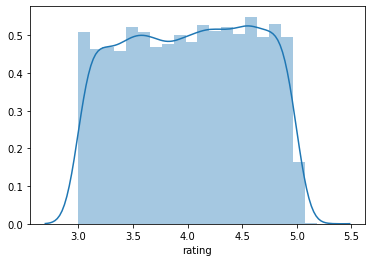

In [44]:
sns.distplot(airbnb['rating'], bins=20)

In [45]:
airbnb[airbnb['rating'] > 5]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Entire Home or Apartment,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Private Room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Entire Home or Apartment,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


In [46]:
airbnb[airbnb['rating'] > 5].index

Int64Index([1925, 6732, 8821], dtype='int64')

In [47]:
airbnb.drop(airbnb[airbnb['rating'] > 5].index, inplace=True)

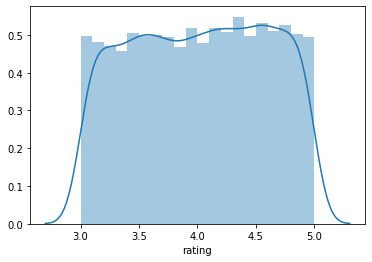

In [48]:
sns.distplot(airbnb['rating'], bins=20)

In [49]:
airbnb['rating'].max()

4.999561105

In [50]:
#Cleaning missing Data
#Inspect and understand missing data
#Drop, Impute, 

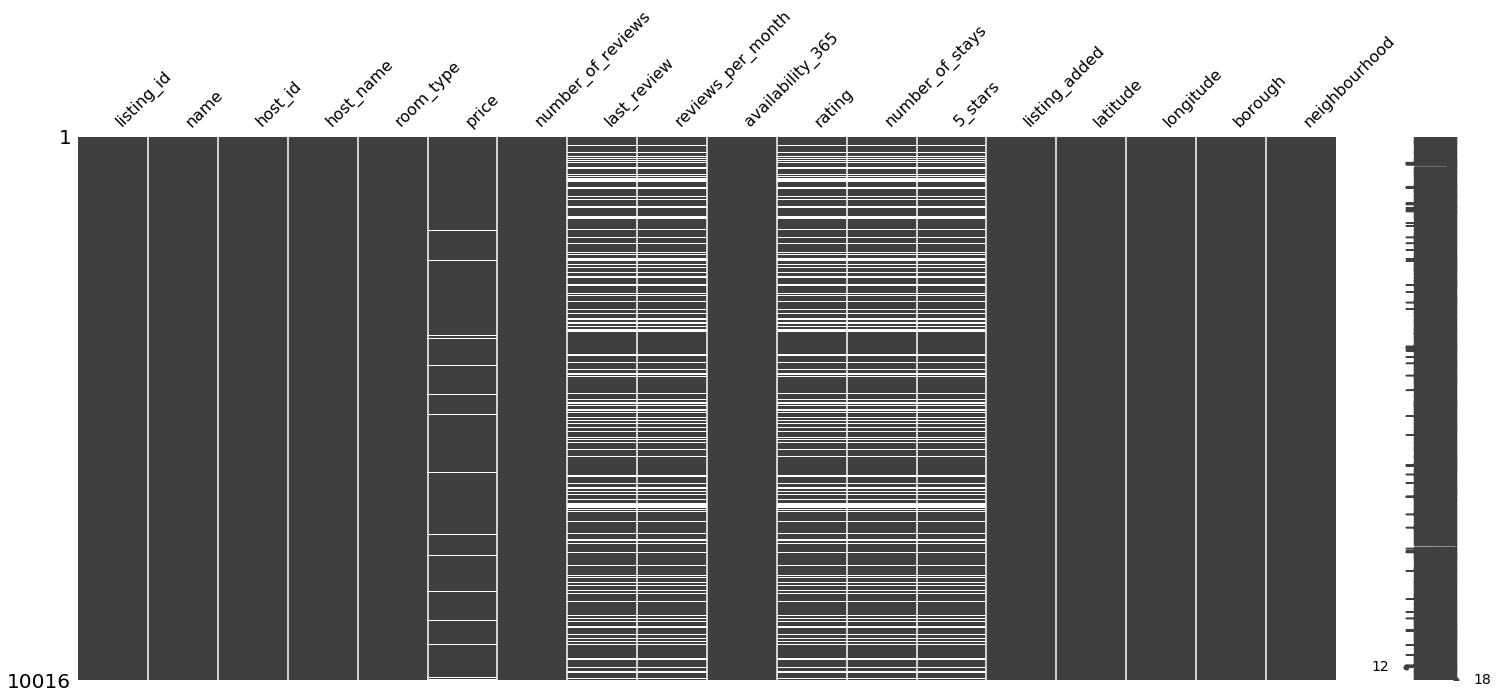

In [51]:
msno.matrix(airbnb)

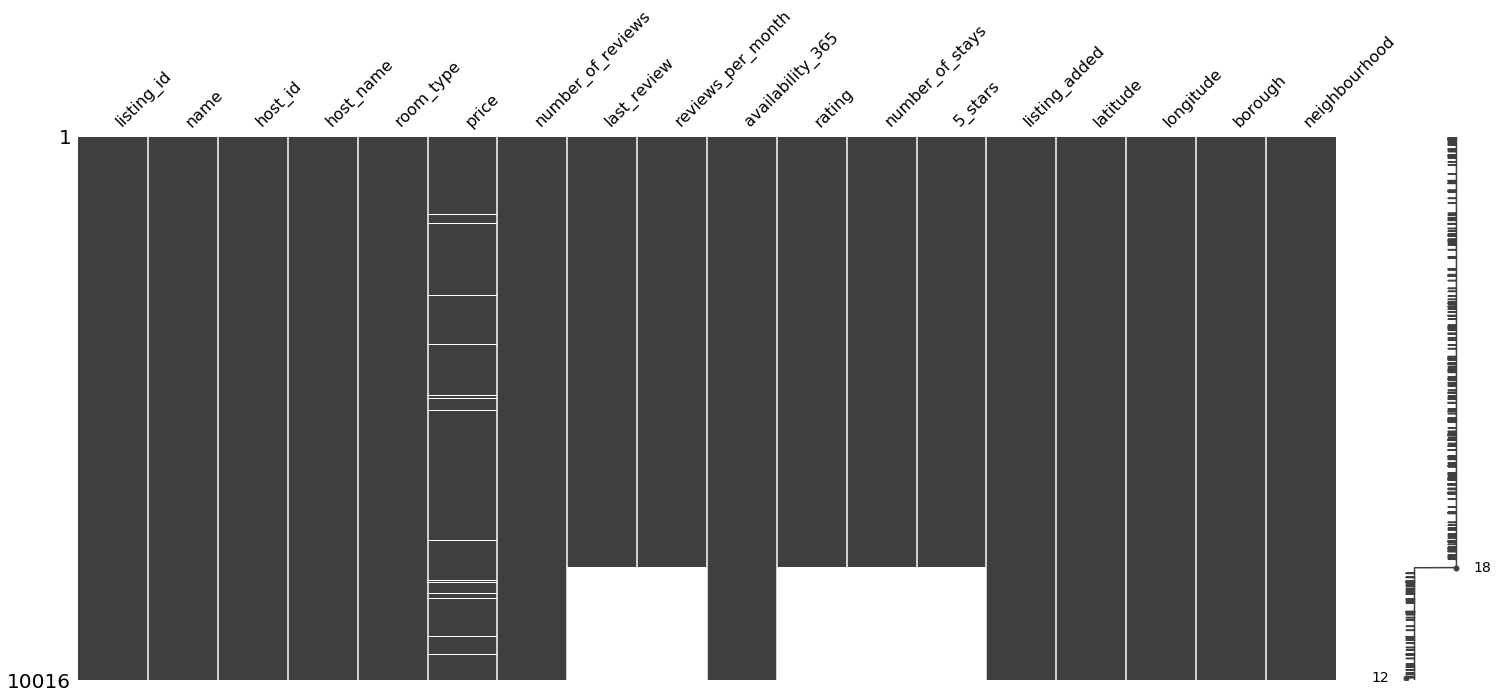

In [52]:
msno.matrix(airbnb.sort_values(by= 'rating'))

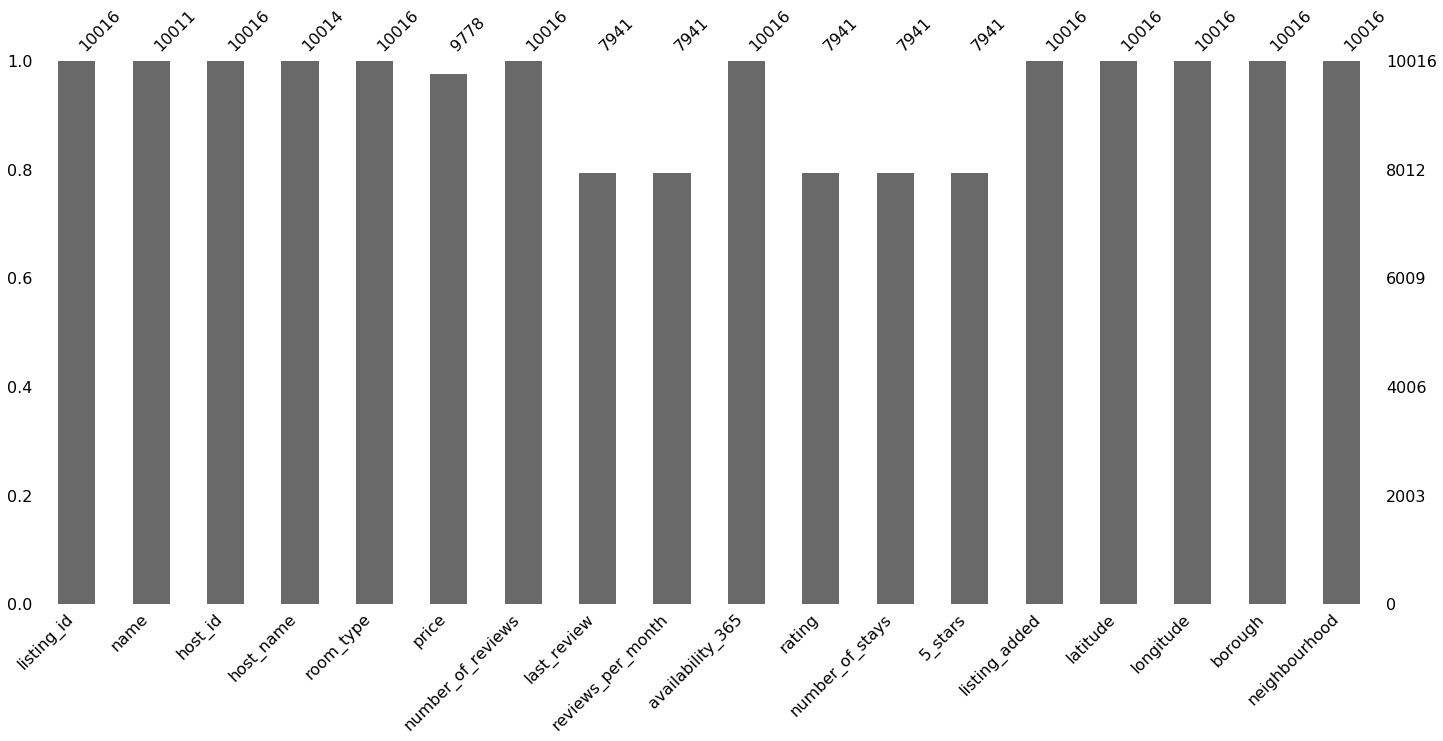

In [53]:
msno.bar(airbnb)

In [54]:
airbnb[airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0.0,2075.000000,0.0,0.0,0.0,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaN,104.531566,NaN,NaN,NaN,40.732074,-73.956771
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,138.266525,NaN,NaN,NaN,0.051168,0.041065
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaN,7.000000,NaN,NaN,NaN,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaN,211.000000,NaN,NaN,NaN,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaN,365.000000,NaN,NaN,NaN,40.911690,-73.727310


In [55]:
airbnb[~airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,7.941000e+03,7.941000e+03,7750.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000
mean,1.836419e+07,6.474110e+07,140.230581,28.336482,1.353901,114.320111,4.014050,34.003778,0.718540,40.728335,-73.950632
std,1.068788e+07,7.606089e+07,163.630337,46.746949,1.615659,129.789313,0.574787,56.096338,0.079927,0.055491,0.047017
min,3.831000e+03,2.787000e+03,0.000000,1.000000,0.010000,0.000000,3.000633,1.200000,0.600026,40.508680,-74.239860
25%,8.964308e+06,7.138163e+06,69.000000,3.000000,0.200000,0.000000,3.519751,3.600000,0.655573,40.688560,-73.982130
50%,1.927436e+07,2.947846e+07,105.000000,9.000000,0.700000,54.000000,4.027415,10.800000,0.709747,40.721820,-73.954410
75%,2.787660e+07,1.016578e+08,170.000000,32.000000,2.000000,229.000000,4.515626,38.400000,0.763948,40.763390,-73.934930
max,3.635113e+07,2.733615e+08,8000.000000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280


In [56]:
airbnb = airbnb.fillna({
    'reviews_per_month': 0,
    'number_of_stays':0,
    '5_stars':0
    
})

is_rated = np.where(airbnb['rating'].isna() == True, 0,1 )
airbnb['is_rated'] = is_rated

In [57]:
airbnb.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire Home or Apartment,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire Home or Apartment,150.0,0,NaT,0.00,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights,0
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire Home or Apartment,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side,1
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1


In [58]:
airbnb.describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,1.001600e+04,1.001600e+04,9778.00000,10016.000000,10016.000000,10016.000000,7941.000000,10016.000000,10016.000000,10016.000000,10016.000000,10016.000000
mean,1.927121e+07,6.794879e+07,150.87523,22.466054,1.073416,112.292232,4.014050,26.959265,0.569681,40.729109,-73.951904,0.792831
std,1.094818e+07,7.861432e+07,205.86666,43.178812,1.539684,131.643100,0.574787,51.814575,0.299792,0.054642,0.045913,0.405298
min,3.831000e+03,2.787000e+03,0.00000,0.000000,0.000000,0.000000,3.000633,0.000000,0.000000,40.508680,-74.239860,0.000000
25%,9.667862e+06,7.910992e+06,69.00000,1.000000,0.040000,0.000000,3.519751,1.200000,0.611654,40.689878,-73.982833,1.000000
50%,2.006195e+07,3.164078e+07,106.00000,5.000000,0.370000,44.000000,4.027415,6.000000,0.681882,40.723040,-73.955430,1.000000
75%,2.931836e+07,1.074344e+08,180.00000,22.000000,1.550000,226.000000,4.515626,26.400000,0.750020,40.763393,-73.936060,1.000000
max,3.648724e+07,2.741034e+08,8000.00000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280,1.000000


In [59]:
today = dt.date.today()
today

datetime.date(2020, 8, 5)

In [60]:
airbnb[airbnb['last_review'].dt.date > today]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated


In [61]:
airbnb[airbnb['listing_added'].dt.date > today]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1
124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,Private Room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072,Brooklyn,Bushwick,1
511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,Entire Home or Apartment,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840,Brooklyn,Crown Heights,1
521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,Private Room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696,Queens,Sunnyside,1


In [62]:
airbnb = airbnb[~(airbnb['listing_added'].dt.date > today)]

In [63]:
inconsistent_dates = airbnb['listing_added'].dt.date > airbnb['last_review'].dt.date

In [64]:
airbnb = airbnb[~inconsistent_dates]

In [65]:
airbnb[(airbnb['listing_added'].dt.date > today)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated


In [66]:
airbnb[airbnb['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,2.380000e+02,2.380000e+02,0.0,238.000000,238.000000,238.000000,191.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,1.805656e+07,6.262965e+07,NaN,22.445378,1.117563,98.953782,4.078343,26.934454,0.577721,40.727270,-73.946071,0.802521
std,1.065176e+07,7.518785e+07,NaN,35.798003,1.666262,125.872256,0.568705,42.957603,0.297066,0.057426,0.048688,0.398936
min,8.092400e+04,1.145900e+05,NaN,0.000000,0.000000,0.000000,3.007359,0.000000,0.000000,40.581980,-74.160620,0.000000
25%,8.282298e+06,6.034050e+06,NaN,1.000000,0.080000,0.000000,3.646496,1.200000,0.613462,40.688043,-73.970362,1.000000
50%,1.863600e+07,2.809524e+07,NaN,6.000000,0.350000,23.000000,4.149203,7.200000,0.681884,40.719925,-73.951370,1.000000
75%,2.753759e+07,1.009006e+08,NaN,26.000000,1.435000,192.000000,4.538671,31.200000,0.746239,40.762030,-73.927908,1.000000
max,3.638875e+07,2.668265e+08,NaN,207.000000,8.870000,365.000000,4.957646,248.400000,0.934979,40.870390,-73.734620,1.000000


In [67]:
airbnb[~airbnb['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,7744.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000
mean,1.929899e+07,6.802694e+07,150.895006,22.473291,1.072237,112.610418,4.012171,26.967949,0.569423,40.729144,-73.952050,0.792468
std,1.095449e+07,7.866753e+07,205.924526,43.356344,1.536837,131.776307,0.574795,52.027613,0.299950,0.054564,0.045844,0.405560
min,3.831000e+03,2.787000e+03,0.000000,0.000000,0.000000,0.000000,3.000633,0.000000,0.000000,40.508680,-74.239860,0.000000
25%,9.696118e+06,7.948042e+06,69.000000,1.000000,0.040000,0.000000,3.518919,1.200000,0.611650,40.689910,-73.983030,1.000000
50%,2.010191e+07,3.165520e+07,106.000000,5.000000,0.370000,44.000000,4.024223,6.000000,0.681882,40.723095,-73.955595,1.000000
75%,2.938997e+07,1.074344e+08,180.000000,22.000000,1.550000,228.000000,4.514286,26.400000,0.750130,40.763433,-73.936292,1.000000
max,3.648724e+07,2.741034e+08,8000.000000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280,1.000000


In [68]:
airbnb[airbnb['price'].isna()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
172,7116071,30 Minutes to Manhattan / Sleeps 7,36903907,Moe,Entire Home or Apartment,NaN,207,2019-07-02,4.26,287,3.990992,248.4,0.685576,2018-12-27,40.61112,-74.00028,Brooklyn,Bensonhurst,1
190,13395955,Adorable Prospect Heights 1 Bedroom,34468399,Nancy,Entire Home or Apartment,NaN,3,2018-07-21,0.08,0,3.449585,3.6,0.602585,2018-01-15,40.67649,-73.96697,Brooklyn,Prospect Heights,1
240,27903031,Prewar Gem in Middle of Everything!,7580102,(Email hidden by Airbnb),Private Room,NaN,3,2018-11-17,0.31,0,3.914751,3.6,0.691139,2018-05-14,40.76399,-73.98077,Manhattan,Midtown,1
280,1700471,CHARM Rm HAMILTON HEIGHTS Harlem,8289663,Shane,Private Room,NaN,101,2019-06-10,1.44,340,4.747851,121.2,0.913284,2018-12-05,40.81976,-73.94029,Manhattan,Harlem,1
333,30235482,*Groovy Budget room for the traveler!,226339724,David And Annette,Private Room,NaN,5,2019-07-05,1.36,362,4.063096,6.0,0.660673,2018-12-30,40.68052,-73.91216,Brooklyn,Bedford-Stuyvesant,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,1420559,Great 1BR apartment in a convenient location,3349838,Tom,Entire Home or Apartment,NaN,4,2016-07-05,0.06,41,3.030241,4.8,0.654444,2015-12-31,40.74449,-73.95201,Queens,Long Island City,1
9961,6601120,Entire place in Williamsburg. Rustic Den.,34534668,Gohe,Entire Home or Apartment,NaN,5,2018-04-29,0.27,0,3.014789,6.0,0.616635,2017-10-24,40.71297,-73.96409,Brooklyn,Williamsburg,1
9972,18961150,Room with a view,5139965,Jamie,Entire Home or Apartment,NaN,3,2017-06-26,0.12,0,3.659673,3.6,0.785499,2016-12-21,40.75125,-73.93807,Queens,Long Island City,1
10009,1474752,Dope Williamsburg Apartment,2259113,Ange,Private Room,NaN,23,2019-05-06,0.32,159,3.962641,27.6,0.734784,2018-10-31,40.71215,-73.95637,Brooklyn,Williamsburg,1


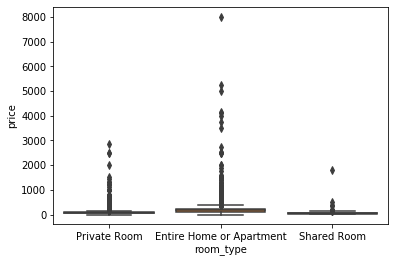

In [69]:
sns.boxplot(x= 'room_type', y= 'price', data=airbnb)

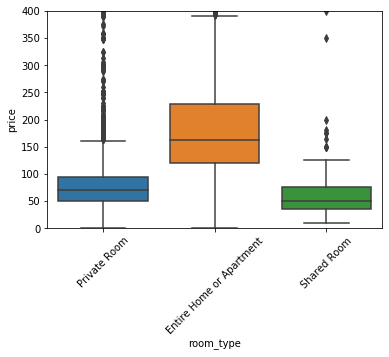

In [70]:
sns.boxplot(x= 'room_type', y= 'price', data=airbnb)
plt.ylim(0, 400)
plt.xticks(rotation=45)
plt.show()

In [71]:
airbnb.groupby('room_type').median()['price']

room_type
Entire Home or Apartment    163.0
Private Room                 70.0
Shared Room                  50.0
Name: price, dtype: float64

In [72]:
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Private Room'), 'price'] = 70.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Shared Room'), 'price'] = 50.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Entire Home or Apartment'), 'price'] = 163.0

In [73]:
airbnb.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                   0
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
is_rated                0
dtype: int64

In [74]:
airbnb[airbnb['price'] == 0]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
4645,20933849,the best you can find,13709292,Qiuchi,Entire Home or Apartment,0.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-04-21,40.75091,-73.97597,Manhattan,Murray Hill,0
8509,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Private Room,0.0,1,2018-01-06,0.05,28,3.778723,1.2,0.757915,2017-07-03,40.69023,-73.95428,Brooklyn,Bedford-Stuyvesant,1


In [75]:
airbnb[(airbnb['price'] == 0) & (airbnb['room_type'] == 'Entire Home or Apartment')].replace(0.0, 163.0, inplace= True)
airbnb[(airbnb['price'] == 0) & (airbnb['room_type'] == 'Entire Home or Apartment')].replace(0.0, 70.0, inplace= True)
     
airbnb[airbnb['price'] == 0]

/Users/darragh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
4645,20933849,the best you can find,13709292,Qiuchi,Entire Home or Apartment,0.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-04-21,40.75091,-73.97597,Manhattan,Murray Hill,0
8509,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Private Room,0.0,1,2018-01-06,0.05,28,3.778723,1.2,0.757915,2017-07-03,40.69023,-73.95428,Brooklyn,Bedford-Stuyvesant,1


In [76]:
#Show all duplicates, identical and non identical
duplicates = airbnb.duplicated(subset='listing_id',keep = False)

In [77]:
airbnb[duplicates].sort_values(by='listing_id')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire Home or Apartment,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
6562,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire Home or Apartment,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Home or Apartment,245.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg,0
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Home or Apartment,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Home or Apartment,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Home or Apartment,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Home or Apartment,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Home or Apartment,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1


In [78]:
airbnb = airbnb.drop_duplicates()

In [79]:
#Show remaining non identical duplicates
duplicated = airbnb.duplicated(subset='listing_id', keep= False)

In [80]:
airbnb[duplicated].sort_values(by= 'listing_id')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Home or Apartment,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Home or Apartment,245.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg,0
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Home or Apartment,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Home or Apartment,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Home or Apartment,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Home or Apartment,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire Home or Apartment,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1
3430,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire Home or Apartment,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1


In [81]:
column_names = airbnb.columns
column_names

Index(['listing_id', 'name', 'host_id', 'host_name', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added', 'latitude', 'longitude', 'borough', 'neighbourhood',
       'is_rated'],
      dtype='object')

In [82]:
aggregations = {column_name:'first' for column_name in column_names.difference(['listing_id', 'listing_added', 'rating', 'price'])}
aggregations['price'] = 'mean'
aggregations['rating'] = 'mean'
aggregations['listing_added'] = 'max'
aggregations


{'5_stars': 'first',
 'availability_365': 'first',
 'borough': 'first',
 'host_id': 'first',
 'host_name': 'first',
 'is_rated': 'first',
 'last_review': 'first',
 'latitude': 'first',
 'longitude': 'first',
 'name': 'first',
 'neighbourhood': 'first',
 'number_of_reviews': 'first',
 'number_of_stays': 'first',
 'reviews_per_month': 'first',
 'room_type': 'first',
 'price': 'mean',
 'rating': 'mean',
 'listing_added': 'max'}

In [83]:
airbnb[['host_id', 'listing_id']].dtypes

host_id       int64
listing_id    int64
dtype: object

In [84]:
airbnb = airbnb.groupby('listing_id').agg(aggregations).reset_index()

In [85]:
airbnb[airbnb.duplicated(subset= 'listing_id', keep= False)]

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added


In [86]:
# Are there inconsitencies in the price?
# What is the average price of listings by borough? Visualize your results with a bar plot?
# What is the average availability in days of listings by borough? Visualize your results with a bar plot?
# What is the median price per room type in each borough? Visualize your results with a bar plot?
# Visualize the number of listings over time.

In [87]:
borough_mean_median_min_max = airbnb.groupby(['borough', 'room_type'])['price'].agg(['mean','median','min','max']).reset_index()
borough_mean_median_min_max

,borough,room_type,mean,median,min,max
0,Bronx,Entire Home or Apartment,135.066667,99.0,37.0,1000.0
1,Bronx,Private Room,68.594203,55.0,27.0,680.0
2,Bronx,Shared Room,43.750000,31.5,20.0,150.0
3,Brooklyn,Entire Home or Apartment,180.073947,149.0,10.0,8000.0
4,Brooklyn,Private Room,73.832459,65.0,0.0,1333.0
5,Brooklyn,Shared Room,50.320000,38.0,18.0,200.0
6,Manhattan,Entire Home or Apartment,242.377417,193.0,0.0,5250.0
7,Manhattan,Private Room,113.397991,85.0,10.0,2850.0
8,Manhattan,Shared Room,79.237624,65.0,10.0,500.0
9,Queens,Entire Home or Apartment,139.838480,120.0,10.0,750.0


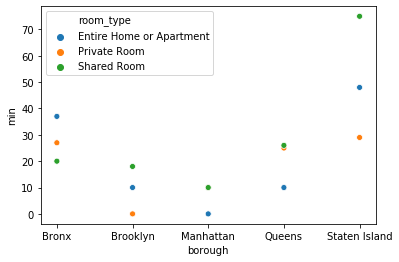

In [88]:
sns.scatterplot(x='borough', y='min', hue='room_type', ci=None, data= borough_mean_median_min_max)

In [89]:
bkln_privateR_min = airbnb[(airbnb['borough'] == 'Brooklyn') & (airbnb['room_type'] == 'Private Room')]
bkln_privateR_min.sort_values(by='price').head(2)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
4600,18750597,0.757915,28,Brooklyn,8993084,Kimberly,1,2018-01-06,40.69023,-73.95428,"Huge Brooklyn Brownstone Living, Close to it all.",Bedford-Stuyvesant,1,1.2,0.05,Private Room,0.0,3.778723,2017-07-03
9628,35642891,0.605253,0,Brooklyn,268138154,Julio,1,2019-06-18,40.69640,-73.91898,Beautiful room in Bushwick,Bushwick,2,2.4,2.00,Private Room,10.0,4.674334,2018-12-13


In [90]:
bk_sharedR_min = airbnb[(airbnb['borough'] == 'Brooklyn') & (airbnb['room_type'] == 'Shared Room')]
bk_sharedR_min.sort_values(by='price').head(2)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
9066,34228341,0.681845,0,Brooklyn,51596474,Antony,1,2019-06-15,40.62638,-74.01837,A.Hamilton(for GUYS only),Bay Ridge,1,1.2,1.00,Shared Room,18.0,3.733816,2018-12-10
8350,31930706,0.612946,0,Brooklyn,51596474,Antony,1,2019-04-21,40.58737,-73.96882,Beautiful apartment in Gravesend(Girls share r...,Gravesend,2,2.4,0.56,Shared Room,20.0,4.585248,2018-10-16


In [91]:
si_mins = airbnb[(airbnb['borough'] == 'Staten Island') & (airbnb['room_type'] == 'Shared Room')]
si_mins.sort_values(by='price').head(2)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
7143,27964104,0.0,37,Staten Island,50756378,Nina,0,NaT,40.61575,-74.08658,Shared Loft in Charming Guest Suite (Rear),Clifton,0,0.0,0.0,Shared Room,75.0,NaN,2018-09-19


In [92]:
queens_mins = airbnb[(airbnb['borough'] == 'Queens') & (airbnb['room_type'] == 'Entire Home or Apartment')]
queens_mins.sort_values(by='price').head(2)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
6704,26235873,0.936053,332,Queens,197169969,Maria,1,2019-07-06,40.68939,-73.79886,Voted #1 Airbnb In NYC,Jamaica,22,26.4,1.76,Entire Home or Apartment,10.0,4.957401,2018-12-31
7533,29511905,0.812718,44,Queens,153141476,Franz,1,2019-06-24,40.70626,-73.81463,CozyStudio /Briarwood Van Wyck station F to city,Briarwood,17,20.4,2.23,Entire Home or Apartment,44.0,4.842451,2018-12-19


In [93]:
mh_mins = airbnb[(airbnb['borough'] == 'Manhattan') & (airbnb['room_type'] == 'Entire Home or Apartment')]
mh_mins.sort_values(by='price').head(2)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
5261,20933849,0.000000,0,Manhattan,13709292,Qiuchi,0,NaT,40.75091,-73.97597,the best you can find,Murray Hill,0,0.0,0.00,Entire Home or Apartment,0.0,NaN,2018-04-21
1596,6301965,0.627614,0,Manhattan,655506,Silvia,1,2018-01-08,40.72340,-73.99967,Beautiful SoHo Loft,SoHo,3,3.6,0.16,Entire Home or Apartment,16.0,3.364032,2017-07-05


In [94]:
mh_mins = airbnb[(airbnb['borough'] == 'Manhattan') & (airbnb['room_type'] == 'Entire Home or Apartment')]
mh_mins.sort_values(by='price').head(2)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
5261,20933849,0.000000,0,Manhattan,13709292,Qiuchi,0,NaT,40.75091,-73.97597,the best you can find,Murray Hill,0,0.0,0.00,Entire Home or Apartment,0.0,NaN,2018-04-21
1596,6301965,0.627614,0,Manhattan,655506,Silvia,1,2018-01-08,40.72340,-73.99967,Beautiful SoHo Loft,SoHo,3,3.6,0.16,Entire Home or Apartment,16.0,3.364032,2017-07-05


In [95]:
airbnb.loc[1597] = airbnb['price'].replace(16.0, 750.0, inplace=True)
airbnb.loc[6706] = airbnb['price'].replace(10.0, 92.0, inplace=True)
airbnb.loc[9630] = airbnb['price'].replace(10.0, 46.0, inplace=True)

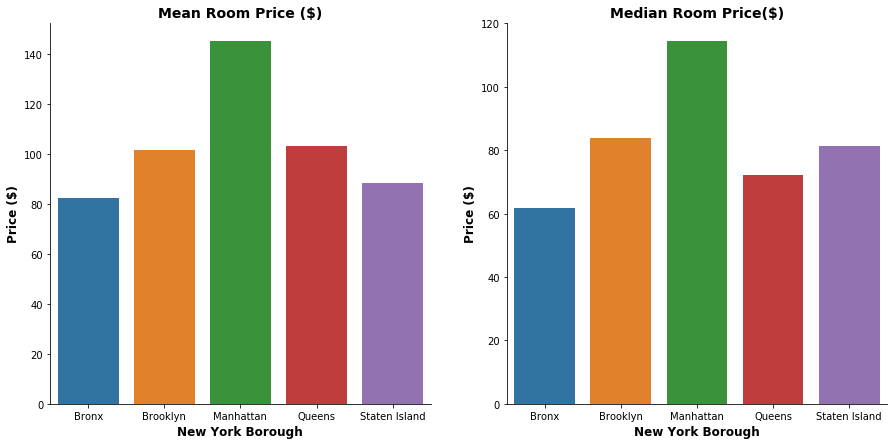

In [96]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

columns_to_plot = ['mean', 'median']
titles_to_plot = ['Mean Room Price ($)', 'Median Room Price($)']

for ax, column, title in zip(axes.flatten(), columns_to_plot, titles_to_plot):
    
    sns.barplot(x='borough', y=column, data=borough_mean_median_min_max, ci= None, ax=ax)
    
    sns.despine()
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('New York Borough', fontsize=12, fontweight='semibold')
    ax.set_ylabel('Price ($)', fontsize=12, fontweight='semibold')

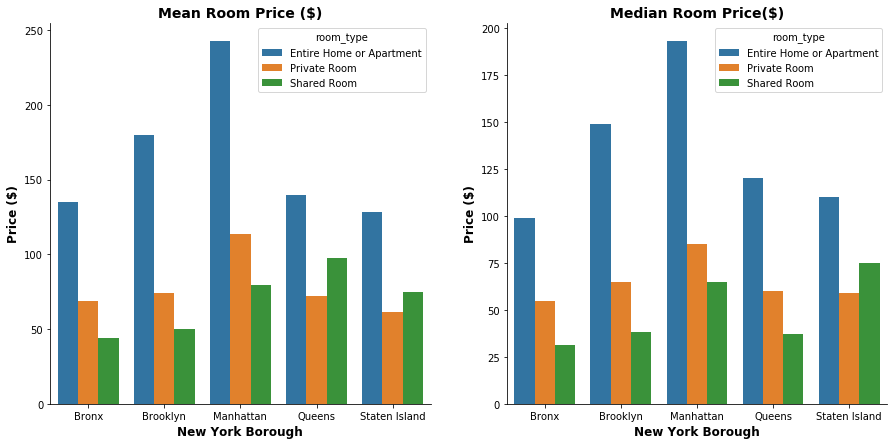

In [99]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

columns_to_plot = ['mean', 'median']
titles_to_plot = ['Mean Room Price ($)', 'Median Room Price($)']

for ax, column, title in zip(axes.flatten(), columns_to_plot, titles_to_plot):
    
    sns.barplot(x='borough', y=column, hue='room_type', data=borough_mean_median_min_max, ci= None, ax=ax)
    
    sns.despine()
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('New York Borough', fontsize=12, fontweight='semibold')
    ax.set_ylabel('Price ($)', fontsize=12, fontweight='semibold')

In [100]:
airbnb[airbnb['borough'] == 'Brooklyn'].sort_values(by='price', ascending=False).head(1)

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
852,2953058.0,0.768022,365.0,Brooklyn,1177497.0,Jessica,1.0,2016-09-15,40.69137,-73.96723,Film Location,Clinton Hill,1.0,1.2,0.03,Entire Home or Apartment,8000.0,4.052232,2016-03-12


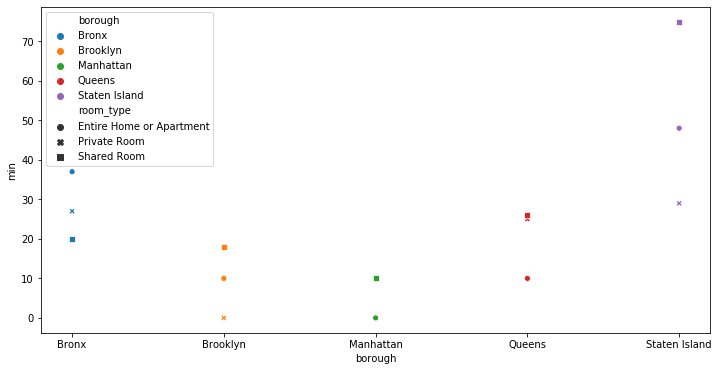

In [101]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='borough', y= 'min', hue='borough', style='room_type',
                data=borough_mean_median_min_max)

In [102]:
borough_avail = airbnb.groupby('borough')['availability_365'].agg(['mean','median']).reset_index()
borough_avail

,borough,mean,median
0,Bronx,146.716157,91.0
1,Brooklyn,99.507613,27.0
2,Manhattan,112.180424,38.0
3,Queens,143.979644,95.0
4,Staten Island,214.205479,232.0


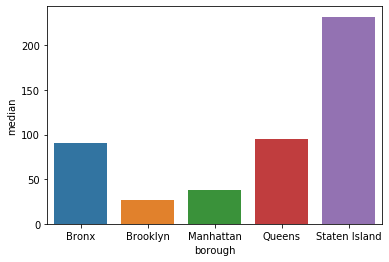

In [103]:
sns.barplot(x='borough', y='median', ci=None, data= borough_avail)

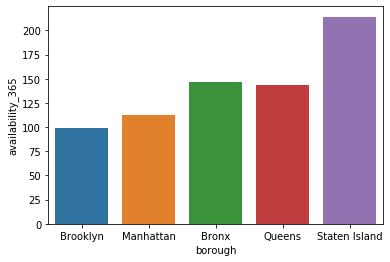

In [104]:
sns.barplot(x='borough', y='availability_365', ci=None, data= airbnb)

In [105]:
borough_mean_median_min_max

,borough,room_type,mean,median,min,max
0,Bronx,Entire Home or Apartment,135.066667,99.0,37.0,1000.0
1,Bronx,Private Room,68.594203,55.0,27.0,680.0
2,Bronx,Shared Room,43.750000,31.5,20.0,150.0
3,Brooklyn,Entire Home or Apartment,180.073947,149.0,10.0,8000.0
4,Brooklyn,Private Room,73.832459,65.0,0.0,1333.0
5,Brooklyn,Shared Room,50.320000,38.0,18.0,200.0
6,Manhattan,Entire Home or Apartment,242.377417,193.0,0.0,5250.0
7,Manhattan,Private Room,113.397991,85.0,10.0,2850.0
8,Manhattan,Shared Room,79.237624,65.0,10.0,500.0
9,Queens,Entire Home or Apartment,139.838480,120.0,10.0,750.0


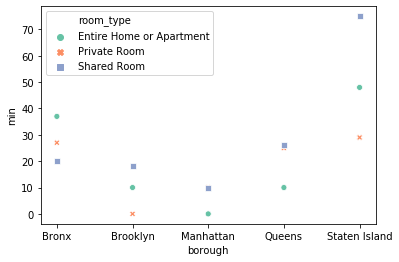

In [106]:
sns.scatterplot(x='borough', y='min', hue='room_type', style="room_type",
                palette="Set2", ci=None, data= borough_mean_median_min_max)

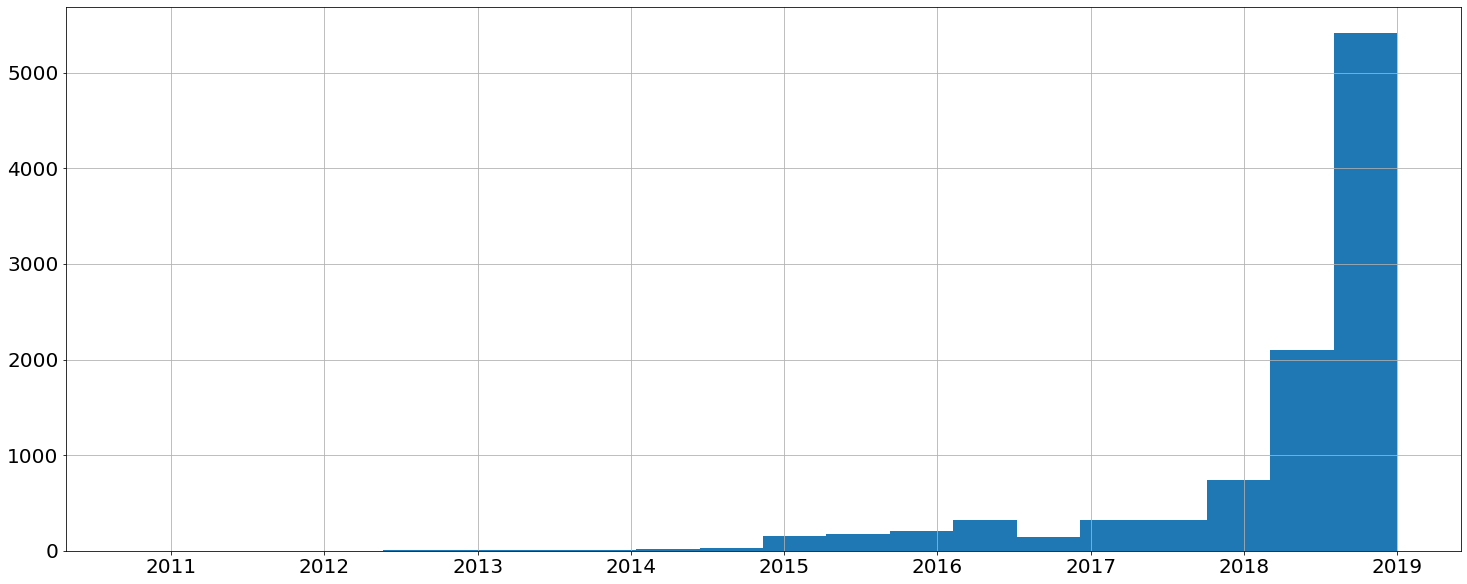

In [107]:
airbnb['listing_added'].hist(bins=20, figsize=(25,10),xlabelsize=20, ylabelsize=20)

In [108]:
airbnb['listing_added'].dt.year.value_counts().sort_values()

2011.0       2
2010.0       2
2012.0       6
2013.0      17
2014.0      76
2019.0     169
2015.0     443
2016.0     587
2017.0     822
2018.0    7863
Name: listing_added, dtype: int64

(2010, 2019)

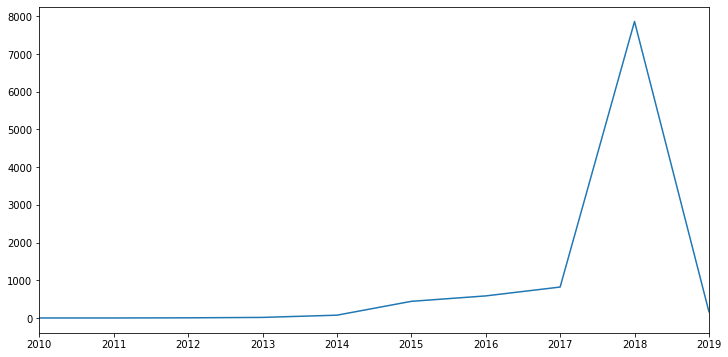

In [109]:
plt.figure(figsize=(12,6))
sns.lineplot(data=airbnb['listing_added'].dt.year.value_counts())
plt.xlim(2010, 2019)